Problem: Elastic Collision

Let the one-dimensional elastic collision of two bodies of masses $m_{1}$ and $m_{2}$ be the case, whose velocities before and after the collision are $v_{1i}$, $v_{1f}$, $v_{2i}$ and $v_{2f}$. The final velocity is defined as:

\begin{equation}
v_{1f} = \left(\frac{m_{1} - m_{2}}{m_{1} + m_{2}}\right)v_{1i} + \left(\frac{2m_{2}}{m_{1} + m_{2}}\right)v_{2i}
\end{equation}
and
\begin{equation}
v_{2f} = \left(\frac{m_{2} - m_{1}}{m_{1} + m_{2}}\right)v_{2i} + \left(\frac{2m_{1}}{m_{1} + m_{2}}\right)v_{1i}
\end{equation}

In [2]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [3]:
#Supose that we have initial velocity data
np.random.seed(1)

vi_1 = np.absolute(np.random.randn(100,1)*5)
vi_2 = np.absolute(np.random.randn(100,1)*3)
print(vi_1.shape)
print(vi_2.shape)

(100, 1)
(100, 1)


In [4]:
#Define the final velocity
m1 = 10
m2 = 3
vf_1 = ((m1 - m2)/(m1+m2))*vi_1 + (2*m2*vi_2)/(m1 + m2)
print(vf_1.shape)

(100, 1)


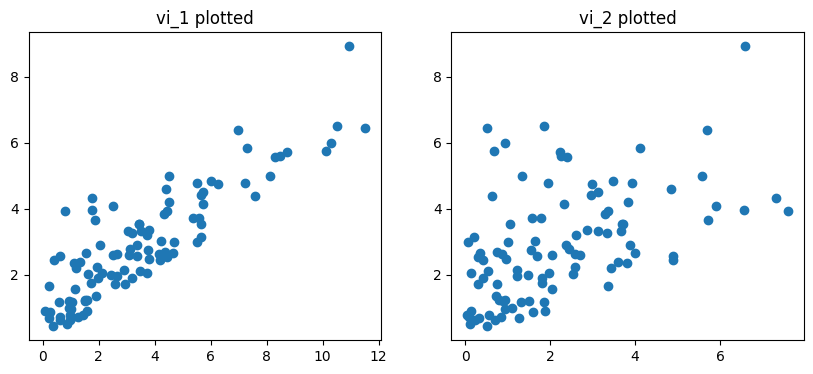

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(vi_1, vf_1)
axes[1].scatter(vi_2, vf_1)
axes[0].set_title("vi_1 plotted")
axes[1].set_title("vi_2 plotted")
plt.show()

In [6]:
#stored the values in a datafram
df = pd.DataFrame({"vi_1":vi_1.reshape(100,), "vi_2":vi_2.reshape(100,), "vf_1":vf_1.reshape(100,)}, index=range(0,100))
df

,vi_1,vi_2,vf_1
0,8.121727,1.341386,4.992339
1,3.058782,3.673523,3.342509
2,2.640859,1.210475,1.980682
3,5.364843,1.780736,3.710640
4,4.327038,3.284736,3.845975
...,...,...,...
95,0.386700,4.882315,2.461599
96,1.719268,1.806958,1.759740
97,0.217984,1.260847,0.699305
98,3.100004,2.432855,2.792089


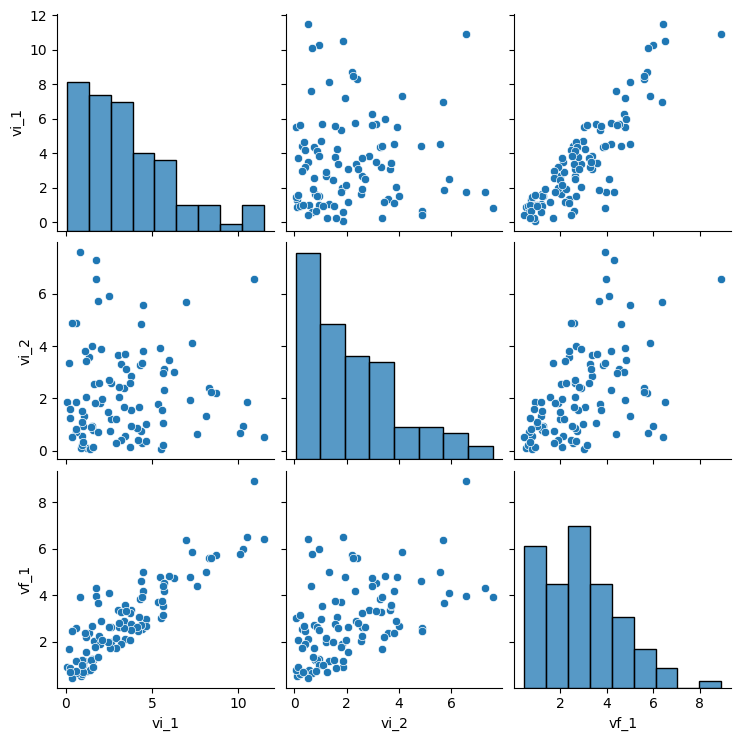

In [7]:
sns.pairplot(df)

As we can see, the initial velocity of object 1 is the one that is most related to the final velocity of object 1.

In [8]:
X, y = df[["vi_1", "vi_2"]], df["vf_1"] #From df, we save the vi_1 and vi_2 columns to X, the vf_1 column to y
print(X)

        vi_1      vi_2
0   8.121727  1.341386
1   3.058782  3.673523
2   2.640859  1.210475
3   5.364843  1.780736
4   4.327038  3.284736
..       ...       ...
95  0.386700  4.882315
96  1.719268  1.806958
97  0.217984  1.260847
98  3.100004  2.432855
99  3.490160  3.133326

[100 rows x 2 columns]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_features = ['vi_1', 'vi_2']
print(X_train.shape)
print(y_train.shape)

(70, 2)
(70,)


In [10]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [11]:
print(f"Model parameters, W: {model.coef_}, b: {model.intercept_}")

Model parameters, W: [0.53846154 0.46153846], b: 4.440892098500626e-16


In [12]:
model_y_pred = model.predict(X_train)
print(model_y_pred.shape)
w = model.coef_
b = model.intercept_
y_pred = np.dot(X_train,w) + b
print(f"prediction using np.dot() and linear.predict match: {(y_pred == model_y_pred).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

(70,)
prediction using np.dot() and linear.predict match: True
Prediction on training set:
[5.98290722 6.51075188 1.1752169  2.38176211]
Target values 
11    5.982907
47    6.510752
85    1.175217
28    2.381762
Name: vf_1, dtype: float64


In [13]:
linear_rmse = np.sqrt(mean_squared_error(y_train, model_y_pred))
print(linear_rmse)

4.6788642366498e-16


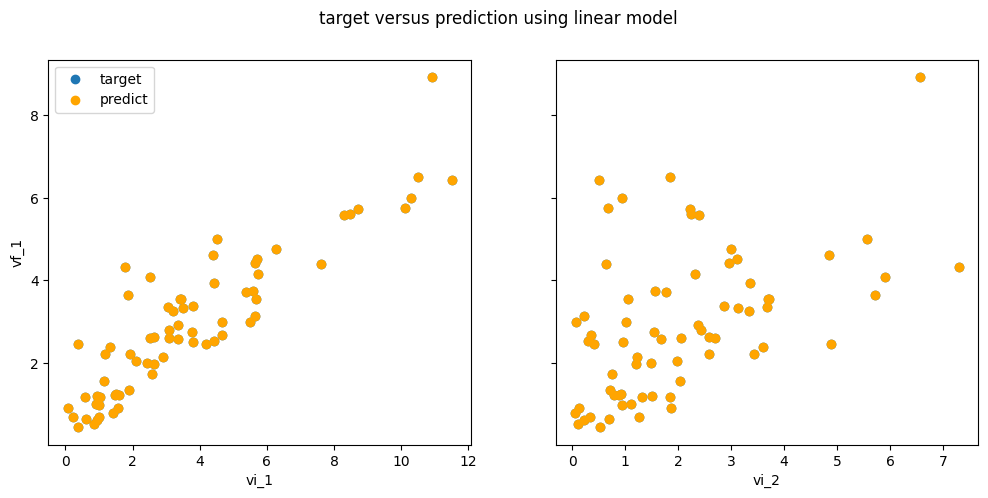

In [14]:
# plot predictions and targets vs original features
fig,ax=plt.subplots(1,2,figsize=(12,5),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train.iloc[:,i],y_train.to_numpy(), label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train.iloc[:,i],model_y_pred,color= 'orange', label = 'predict')
ax[0].set_ylabel("vf_1");
ax[0].legend();
fig.suptitle("target versus prediction using linear model")
plt.show()

In [15]:
#sns.distplot(y_train-model_y_pred)